** Pavel Smirnov @ github.com/pysmirnov **

Как-то так мы считаем характеристики резонансной кривой RLC-контура:

In [3]:
# масштабные коэффициенты
def freq_m(freq):
    freq *= 1e3; return freq;
def cap_m(cap):
    cap /= 1e9; return cap;

def inductance(freq,cap):
    return 1/(freq_m(freq)**2 * cap_m(cap))

def quality_factor(freq,cap,res):
    return 1/(freq_m(freq) * cap_m(cap) * res)

def reactive_res(freq,cap):
    return 1/(freq_m(freq)*cap_m(cap))

def resistance_ind(rho,q):
    return rho/q
                                         
def resistance_smax(rho):
    return rho*1e-3 # tan(1e-3) \approx 1e-3, да
                                         
def current(e_voltage,res_s):
    return e_voltage/res_s

def resistance_sum(r,r_s,r_l):
    return r+r_s+r_l
    #return (ind/cap_m(cap)*res_l) * sqrt( 1 + (res_l/(freq_m(freq)*ind)**2 ))

Теперь посмотрим, что же вышло в нашем контуре.

In [28]:
import numpy as np
from math import pi

data = np.loadtxt('resonance_data.tsv', delimiter='\t')

R_L = []
L = []

out = open("resonance_results.tsv",'w')

for i in range(12):
    out.write("n\t C\t f\t U\t E\t L\t Q\t ρ\t R_Σ\t R_S\t R_L\t I\n")

for n in range(7):
    cap = data[n][0]
    freq = data[n][1]*2*math.pi
    u = data[n][2]
    e = data[n][3]
    r = 3.5 # Ohm
    
    ind = inductance(freq,cap)
    q = quality_factor(freq,cap,r)
    rho = reactive_res(freq,cap)
    r_s = resistance_smax(rho)
    r_l = resistance_ind(rho,q)
    r_sum = resistance_sum(r,r_s,r_l)
    i = current(e,r_s)
    
    R_L.append(r_l)
    L.append(ind)
    
    out.write(str(n+1)+'\t')
    for i in range(4):
        out.write(str(data[n][i])+'\t')
    # больной printf-like синтаксис...
    out.write("%0.2f\t%0.2f\t%0.2f\t%0.2f\t%0.2f\t%0.2f\t%0.2f\n" % (ind*1e6,q,rho,r_sum,r_s,r_l,i*1e3))

out.close() 

print("R_L = {0:.1f} Ом".format(np.average(R_L)))
print("L = {0:.1f} мкГН".format(np.average(L)*1e6))

R_L = 3.5 Ом
L = 979.1 мкГН


Построим АЧХ для двух контуров:

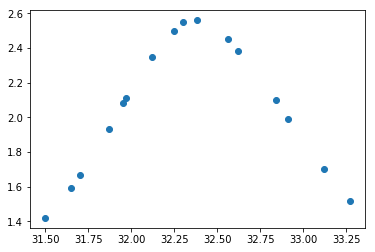

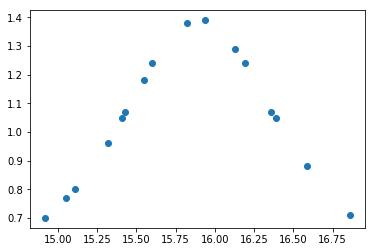

In [40]:
data = []
data = np.loadtxt('freq_response.tsv', delimiter='\t')

import matplotlib.pyplot as plt

plt.plot(data[:,0],data[:,1],'o')
plt.savefig("freq_response_c1.svg", format="svg")
plt.show()

plt.plot(data[:,2],data[:,3],'o')
plt.savefig("freq_response_c1.svg", format="svg")
plt.show()
